In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image

C:\Users\RAJ\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\RAJ\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\RAJ\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\RAJ\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [7]:
import pandas as pd
import os
import shutil

data_dir = "R:/CV/Skin Disease/SkinDiseaseDetectionSystem-master/Dataset/all_images/"

dest_dir = "R:/CV/Skin Disease/SkinDiseaseDetectionSystem-master/Dataset/reorganized/"

skin_df = pd.read_csv('R:/CV/Skin Disease/SkinDiseaseDetectionSystem-master/Dataset/HAM10000_metadata.csv')
print(skin_df['dx'].value_counts())

label=skin_df['dx'].unique().tolist()
label_images = []


for i in label:
    os.mkdir(dest_dir + str(i) + "/")
    sample = skin_df[skin_df['dx'] == i]['image_id']
    label_images.extend(sample)
    for id in label_images:
        shutil.copyfile((data_dir + "/"+ id +".jpg"), (dest_dir + i + "/"+id+".jpg"))
    label_images=[]

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


Found 10015 images belonging to 7 classes.


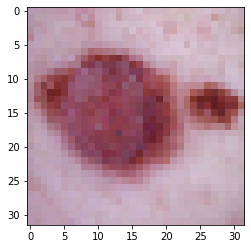

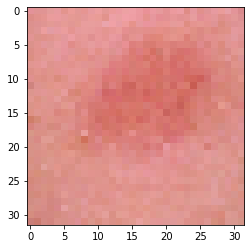

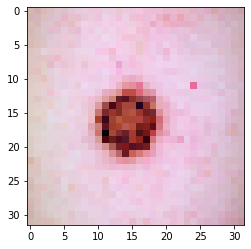

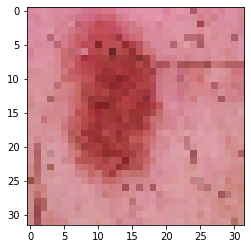

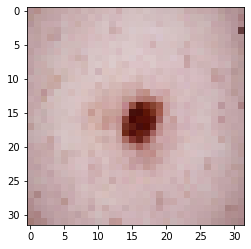

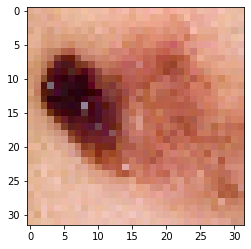

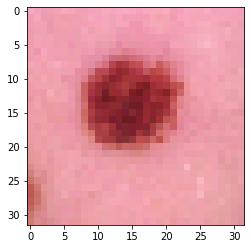

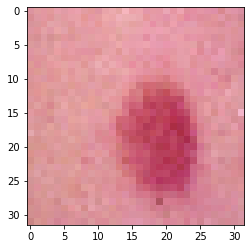

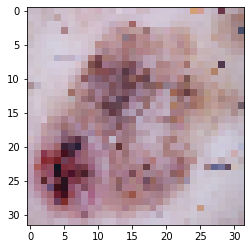

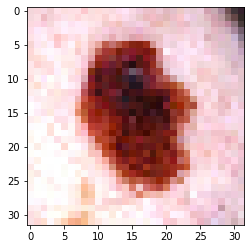

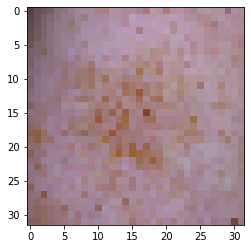

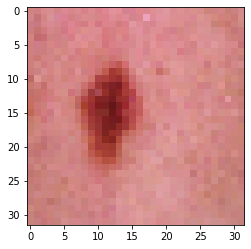

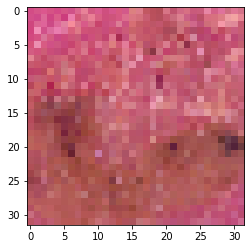

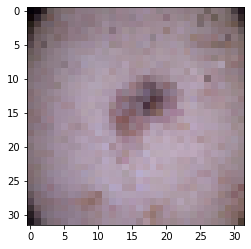

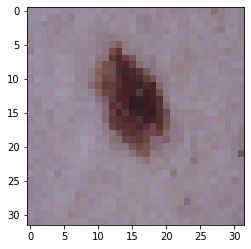

In [8]:
from keras.preprocessing.image import ImageDataGenerator
import os
from matplotlib import pyplot as plt

datagen = ImageDataGenerator()

train_dir = "R:/CV/Skin Disease/SkinDiseaseDetectionSystem-master/Dataset/reorganized/"

train_data_keras = datagen.flow_from_directory(directory=train_dir,
                                         class_mode='categorical',
                                         batch_size=16,
                                         target_size=(32,32))


x, y = next(train_data_keras)

for i in range (0,15):
    image = x[i].astype(int)
    plt.imshow(image)
    plt.show()
